# Introduction

Hello, I continue to learn from where I left off with this project. I am on the learning path at the moment, On This learning path, I make projects and I share with you them. I will mention this topic later in this section. If I were to talk about what I did in this project, Autoencoders is a project I did to learn what it is and how to apply it to the dataset. While doing the project, I took Keras' documentation as my guide. I applied what is in this document to the data set. I will share the link to this documentation in this chapter. If I summarize this notebook shortly, I prepared the dataset for the model firstly and I visualize a few images in the dataset. Then I created my model and applied Autoencoders to the dataset in four different ways. I've added information about what I'm doing in the topic titles. 

As I mentioned before, I said that I am on a learning path. To this learning path, I started with Data Science, continued the Machine Learning, and at the moment, I am learning the topics of Deep Learning. At the same time, I make projects about I learned topics in this learning path. I already mentioned above. I will share with you my completed projects in this chapter. In this learning path, I would be very happy if you would examine my project and help me with how to improve my project or what I should do in this development path. I wish you a good day and good work.

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

[Documantation of Keras about Autoencoders](https://blog.keras.io/building-autoencoders-in-keras.html)

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)
- [Cat And Dog Prediction With ANN](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)
- [Linear Regression With Pytorch](https://www.kaggle.com/code/ihsncnkz/linear-regression-with-pytorch)
- [My First Convolutional Neural Network(CNN) Work](https://www.kaggle.com/code/ihsncnkz/my-first-convolutional-neural-network-cnn-work)
- [Predict With CNN Model](https://www.kaggle.com/code/ihsncnkz/predict-with-cnn-model)
- [Logistic Regression, ANN And CNN With Pytorch](https://www.kaggle.com/code/ihsncnkz/logistic-regression-ann-and-cnn-with-pytorch)
- [RNN And LSTM With Keras](https://www.kaggle.com/code/ihsncnkz/rnn-and-lstm-with-keras)
- [Classification With CNN And ResNet - PyTorch - CPU](https://www.kaggle.com/code/ihsncnkz/classification-with-cnn-and-resnet-pytorch-cpu)
- [Classification With CNN And ResNet - PyTorch - GPU](https://www.kaggle.com/code/ihsncnkz/classification-with-cnn-and-resnet-pytorch-gpu)
- [Transfer Learning With Keras - VGG16 / VGG19](https://www.kaggle.com/code/ihsncnkz/transfer-learning-with-keras-vgg16-vgg19)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)

# Content <a id= "cont"></a>
- [Data Prepare And Review](#0)
- [Autoencoders](#1)
    - [The Simple Autoencoders](#1a)
        - [Create Model](#1a1)
        - [Train Model](#1a2)
        - [Model Result Evaluation](#1a3)
        - [Save History](#1a4)
        - [Load History](#1a5)
        - [Evaluate Result And Visualizetion](#1a6)
    - [Deep Autoencoder](#1b)
        - [Create Model](#1b1)
        - [Train Model](#1b2)
        - [Model Result Evaluation](#1b3)
    - [Convolutional Autoencoder](#1c)
        - [Prepare Data For Create Model](#1c1)
        - [Create Model](#1c2)
        - [Train Model](#1c3)
        - [Model Result Evaluation](#1c4)
    - [Application To Image Denoising](#1d)
        - [Change Dataset](#1d1)
        - [Train Model](#1d2)
        - [Model Result Evaluation](#1d3)
- [CONCLUSION](#3)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import json, codecs
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


# Data Prepare And Review <a id = "0"></a>
[Go Content](#cont)

In this chapter, I prepared the dataset for the model and I reviewed it.

In [2]:
# I read the dataset with the pandas library.
train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")

In [3]:
# Train dataset
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# test dataset
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# I removed the label column because I don't need it.
x_train = train.drop(labels = ["label"], axis = 1)
x_test = test.drop(labels = ["label"], axis = 1)
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# I changed the type of dataset.
# I normalize the data by dividing by 255.0.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

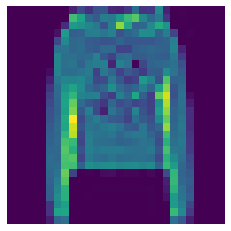

In [7]:
# I visualized some image within the dataset.
img = x_train.iloc[45000].to_numpy()
img = img.reshape((28,28))
plt.imshow(img)
plt.axis("off")
plt.show()

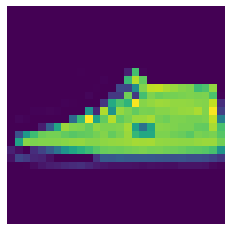

In [8]:
# I visualized some image within the dataset.
img = x_train.iloc[19246].to_numpy()
img = img.reshape((28,28))
plt.imshow(img)
plt.axis("off")
plt.show()

# Autoencoders <a id = "1"></a>
[Go Content](#cont)

**What is the Autoencoders?**

Autoencoders are neural networks. Neural networks are composed of multiple layers, and the defining aspect of an autoencoder is that the input layers contain exactly as much information as the output layer. The reason that the input layer and output layer has the exact same number of units is that an autoencoder aims to replicate the input data. It outputs a copy of the data after analyzing it and reconstructing it in an unsupervised fashion.

If You want more information about Autoencoders, [click here](https://www.unite.ai/what-is-an-autoencoder/)

**Autoencoders' Structure** <br>
![Autoencoders' Structure](https://www.jeremyjordan.me/content/images/2018/03/Screen-Shot-2018-03-07-at-8.24.37-AM.png)

## The Simple Autoencoders <a id = "1a"></a>
[Go Content](#cont)

In this chapter, I created a basic Autoencoders model and I made to train with this model. I visualized the results of simple autoencoders.

### Create Model <a id = "1a1"></a>
[Go Content](#cont)

I created the model in the below code.

In [9]:
input_img = Input(shape = (784,))

encoded0 = Dense(32, activation = "relu")(input_img)

encoded1 = Dense(16, activation = "relu")(encoded0)

decoded0 = Dense(32, activation = "relu")(encoded1)

decoded1 = Dense(784, activation = "sigmoid")(decoded0)

sim_autoencoder = Model(input_img, decoded1)

sim_autoencoder.compile(optimizer = "rmsprop", loss = "binary_crossentropy")

2022-09-21 20:05:02.013845: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
# Structure of Model
sim_autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 52,064
Trainable params: 52,064
Non-trainable params: 0
_________________________________________________________________


### Train Model <a id = "1a2"></a>
[Go Content](#cont)

In this chapter, I am training with the model.

In [11]:
sim_hist = sim_autoencoder.fit(x_train, x_train,
                      epochs = 100,
                      batch_size = 256,
                      shuffle = True,
                      validation_data = (x_train, x_train))

2022-09-21 20:05:03.670320: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
235/235 [==============================] - 9s 32ms/step - loss: 0.4178 - val_loss: 0.3571
Epoch 2/100
235/235 [==============================] - 4s 18ms/step - loss: 0.3411 - val_loss: 0.3298
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.3250 - val_loss: 0.3195
Epoch 4/100
235/235 [==============================] - 3s 14ms/step - loss: 0.3192 - val_loss: 0.3160
Epoch 5/100
235/235 [==============================] - 3s 13ms/step - loss: 0.3154 - val_loss: 0.3148
Epoch 6/100
235/235 [==============================] - 3s 13ms/step - loss: 0.3124 - val_loss: 0.3123
Epoch 7/100
235/235 [==============================] - 3s 14ms/step - loss: 0.3099 - val_loss: 0.3090
Epoch 8/100
235/235 [==============================] - 3s 14ms/step - loss: 0.3078 - val_loss: 0.3080
Epoch 9/100
235/235 [==============================] - 3s 13ms/step - loss: 0.3061 - val_loss: 0.3053
Epoch 10/100
235/235 [==============================] - 3s 13ms/step - loss: 0.304

### Model Result Evaluation <a id = "1a3"></a>
[Go Content](#cont)

In this chapter, I visualized the result of simple autoencoders.

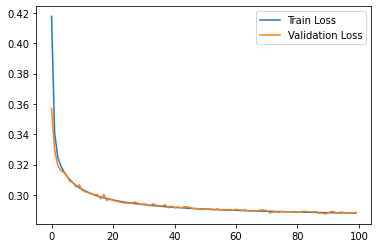

In [12]:
# Visualized the result of simple autoencoders
plt.plot(sim_hist.history["loss"], label = "Train Loss")
plt.plot(sim_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

### Save History <a id = "1a4"></a>
[Go Content](#cont)

In this chapter, I registered the result of simple autoencoders.

In [13]:
# Registered the values(weight and bias) of simple autoencoders
sim_autoencoder.save_weights("autoencoder_model.h5")

In [14]:
# Registered the result of simple autoencoders
with open("sim_autoencoder_hist.json","w") as f:
    json.dump(sim_hist.history,f)

### Load History <a id = "1a5"></a>
[Go Content](#cont)

I have uploaded the results I saved in this section.

In [15]:
# Load resut
with codecs.open("sim_autoencoder_hist.json", "r", encoding = "utf-8") as f:
    load_hist = json.loads(f.read())

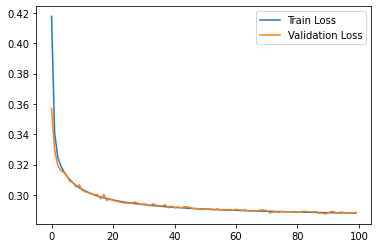

In [16]:
# Visualize the results I saved
plt.plot(load_hist["loss"], label = "Train Loss")
plt.plot(load_hist["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

### Evaluate Result And Visualizetion <a id = "1a6"></a>
[Go Content](#cont)

In this chapter, I visualized the result of simple autoencoders.

In [17]:
# Encodered x_test data with the simple autoencoders.
sim_encoder = Model(input_img, encoded1)
sim_encoded_img = sim_encoder.predict(x_test)

In the code below, I first visualized the unencoded image and then the encoded but not decoded image.

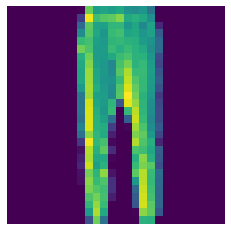

#################################


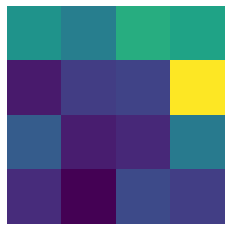

In [18]:
img = x_test.iloc[5000].to_numpy()
img = img.reshape((28,28))
plt.imshow(img)
plt.axis("off")
plt.show()
print("#################################")
plt.figure()
plt.imshow(sim_encoded_img[5000].reshape(4,4))
plt.axis("off")
plt.show()

In [19]:
# I predict x_test with the simple autoencoders.
# I make encoder and decoder.
sim_decoded_img = sim_autoencoder.predict(x_test)

I visualized real images and predicted images in the below code.

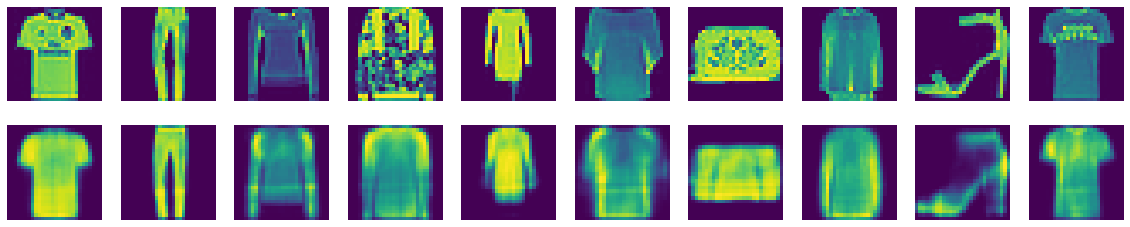

In [20]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    img = x_test.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img)
    plt.axis("off")
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(sim_decoded_img[i].reshape(28,28))
    plt.axis("off")
plt.show()

## Deep Autoencoder <a id = "1b"></a>
[Go Content](#cont)

In this section, I created a slightly deeper autoencoder model than the model in the basic autoencoder section. The reason why I say deep is that I added a few more hidden layers and performed the training.

### Create Model <a id = "1b1"></a>
[Go Content](#cont)

In this chapter, I created a deep autoencoder model.

In [21]:
# Create deep autoencoder model
deep_input_img = Input(shape = (784,))

deepencoded = Dense(256, activation = "relu")(deep_input_img)
deepencoded = Dense(128, activation = "relu")(deepencoded)
deepencoded = Dense(64, activation = "relu")(deepencoded)
deepencoded = Dense(32, activation = "relu")(deepencoded)

deepdecoded = Dense(64, activation = "relu")(deepencoded)
deepdecoded = Dense(128, activation = "relu")(deepdecoded)
deepdecoded = Dense(256, activation = "relu")(deepdecoded)
deepdecoded = Dense(784, activation = "sigmoid")(deepdecoded)

deep_autoencoder = Model(deep_input_img, deepdecoded)
deep_autoencoder.compile(optimizer = "rmsprop", loss = "binary_crossentropy")

In [22]:
# Structure of Model
deep_autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320

### Train Model <a id = "1b2"></a>
[Go Content](#cont)

In this chapter, I am training with the model.

In [23]:
deep_hist = deep_autoencoder.fit(x_train, x_train,
                                 epochs = 100,
                                 batch_size = 256,
                                 shuffle = True,
                                 validation_data = (x_train, x_train))

Epoch 1/100
235/235 [==============================] - 9s 33ms/step - loss: 0.3877 - val_loss: 0.3515
Epoch 2/100
235/235 [==============================] - 6s 24ms/step - loss: 0.3314 - val_loss: 0.3218
Epoch 3/100
235/235 [==============================] - 6s 25ms/step - loss: 0.3189 - val_loss: 0.3101
Epoch 4/100
235/235 [==============================] - 7s 28ms/step - loss: 0.3120 - val_loss: 0.3148
Epoch 5/100
235/235 [==============================] - 6s 25ms/step - loss: 0.3073 - val_loss: 0.3042
Epoch 6/100
235/235 [==============================] - 6s 25ms/step - loss: 0.3036 - val_loss: 0.2981
Epoch 7/100
235/235 [==============================] - 6s 25ms/step - loss: 0.3008 - val_loss: 0.3008
Epoch 8/100
235/235 [==============================] - 6s 25ms/step - loss: 0.2985 - val_loss: 0.3021
Epoch 9/100
235/235 [==============================] - 6s 24ms/step - loss: 0.2967 - val_loss: 0.2937
Epoch 10/100
235/235 [==============================] - 7s 28ms/step - loss: 0.295

### Model Result Evaluation <a id = "1b3"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the deep autoencoder model.

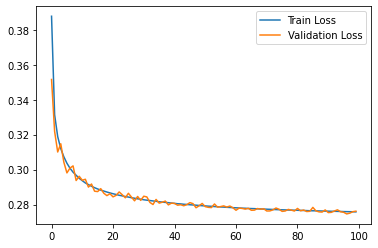

In [24]:
# Visualized the result of deep autoencoders
plt.plot(deep_hist.history["loss"], label = "Train Loss")
plt.plot(deep_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

In the below code, I predict x_test with the deep autoencoders model.

In [25]:
deep_decoded_img = deep_autoencoder.predict(x_test)

In the below code, I visualize prediction results.

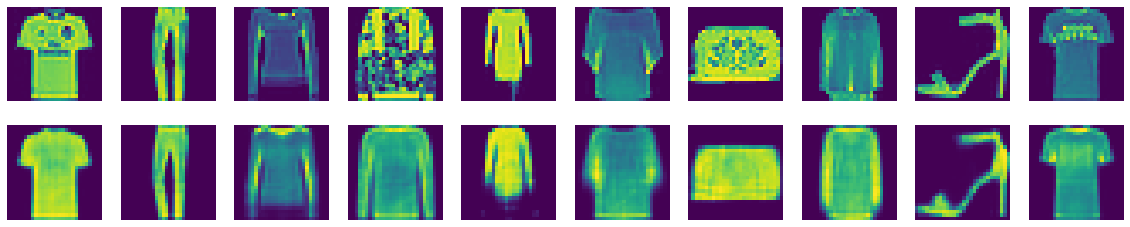

In [26]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    img = x_test.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img)
    plt.axis("off")
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(deep_decoded_img[i].reshape(28,28))
    plt.axis("off")
plt.show()

## Convolutional Autoencoder <a id = "1c"></a>
[Go Content](#cont)

In this chapter, I created an autoencoder with Convolutional neural networks(CNN). 

### Prepare Data For Create Model <a id = "1c1"></a>
[Go Content](#cont)

In this chapter, I prepared the dataset for the model. I changed the shape of the dataset.

In [27]:
x_train_cnn = np.reshape(x_train.to_numpy(), (len(x_train), 28, 28, 1))
x_test_cnn = np.reshape(x_test.to_numpy(), (len(x_test), 28, 28, 1))

In [28]:
print("x_train_cnn shape: ", x_train_cnn.shape)
print("x_test_cnn shape: ", x_test_cnn.shape)

x_train_cnn shape:  (60000, 28, 28, 1)
x_test_cnn shape:  (10000, 28, 28, 1)


### Create Model <a id = "1c2"></a>
[Go Content](#cont)

In this chapter, I created the autoencoder with CNN.

In [29]:
cnn_input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(cnn_input_img)
x = MaxPooling2D((2,2), padding = "same")(x)
x = Conv2D(8, (3,3), activation = "relu", padding = "same")(x)
x = MaxPooling2D((2,2), padding = "same")(x)
x = Conv2D(8, (3,3), activation = "relu", padding = "same")(x)
cnn_encoded = MaxPooling2D((2,2), padding = "same")(x)

x = Conv2D(8, (3,3), activation = "relu", padding = "same")(cnn_encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation = "relu", padding = "same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation = "relu")(x)
x = UpSampling2D((2,2))(x)
cnn_decoded = Conv2D(1, (3,3), activation = "sigmoid", padding = "same")(x)

cnn_autoencoder = Model(cnn_input_img, cnn_decoded)
cnn_autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

### Train Model <a id = "1c3"></a>
[Go Content](#cont)

In this chapter, I am training with the model.

In [30]:
cnn_hist = cnn_autoencoder.fit(x_train_cnn, x_train_cnn,
                              epochs = 100,
                              batch_size = 256,
                              shuffle = True,
                              validation_data = (x_test_cnn, x_test_cnn))

Epoch 1/100
235/235 [==============================] - 16s 64ms/step - loss: 0.4103 - val_loss: 0.3195
Epoch 2/100
235/235 [==============================] - 14s 59ms/step - loss: 0.3136 - val_loss: 0.3074
Epoch 3/100
235/235 [==============================] - 15s 64ms/step - loss: 0.3061 - val_loss: 0.3026
Epoch 4/100
235/235 [==============================] - 14s 59ms/step - loss: 0.3022 - val_loss: 0.2998
Epoch 5/100
235/235 [==============================] - 15s 64ms/step - loss: 0.2997 - val_loss: 0.2974
Epoch 6/100
235/235 [==============================] - 14s 59ms/step - loss: 0.2977 - val_loss: 0.2959
Epoch 7/100
235/235 [==============================] - 15s 64ms/step - loss: 0.2961 - val_loss: 0.2942
Epoch 8/100
235/235 [==============================] - 14s 59ms/step - loss: 0.2947 - val_loss: 0.2929
Epoch 9/100
235/235 [==============================] - 14s 60ms/step - loss: 0.2935 - val_loss: 0.2918
Epoch 10/100
235/235 [==============================] - 15s 62ms/step - l

### Model Result Evaluation <a id = "1c4"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the model.

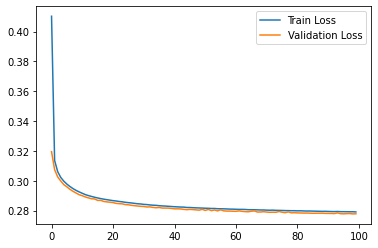

In [31]:
# Visualized the result of model
plt.plot(cnn_hist.history["loss"], label = "Train Loss")
plt.plot(cnn_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

In the below code, I predict x_test_cnn with the model.

In [32]:
cnn_decoded_img = cnn_autoencoder.predict(x_test_cnn)

In the below code, I visualize prediction results.

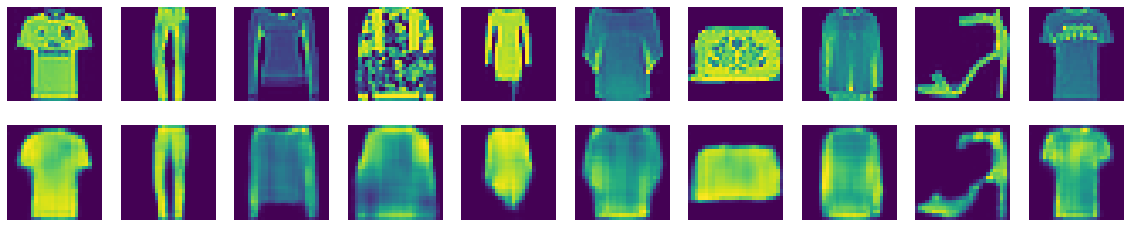

In [33]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    img = x_test.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img)
    plt.axis("off")
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(cnn_decoded_img[i].reshape(28,28))
    plt.axis("off")
plt.show()

## Application To Image Denoising <a id = "1d"></a>
[Go Content](#cont)

In this chapter, I applied image denoising to images of the dataset.

### Change Dataset <a id = "1d1"></a>
[Go Content](#cont)

In this chapter, I prepared the dataset and I applied image denoise into the image of dataset.

In [34]:
# Image Denoise
noise_factor = 0.5
x_train_noisy = x_train_cnn + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train_cnn.shape)
x_test_noisy = x_test_cnn + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_cnn.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

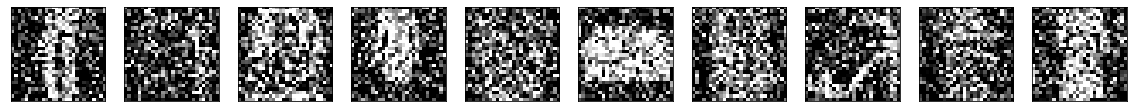

In [35]:
# I visualize the images I create.
n = 10
plt.figure(figsize = (20,2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Train Model <a id = "1d2"></a>
[Go Content](#cont)

In this chapter, I am training with the model. I used the CNN model.

In [36]:
cnn_Aid_hist = cnn_autoencoder.fit(x_train_noisy, x_train_noisy,
                                   epochs = 100,
                                   batch_size = 256,
                                   shuffle = True,
                                   validation_data = (x_test_noisy, x_test_noisy))

Epoch 1/100
235/235 [==============================] - 15s 64ms/step - loss: 0.5726 - val_loss: 0.5679
Epoch 2/100
235/235 [==============================] - 14s 61ms/step - loss: 0.5673 - val_loss: 0.5660
Epoch 3/100
235/235 [==============================] - 16s 67ms/step - loss: 0.5660 - val_loss: 0.5649
Epoch 4/100
235/235 [==============================] - 14s 60ms/step - loss: 0.5650 - val_loss: 0.5641
Epoch 5/100
235/235 [==============================] - 16s 67ms/step - loss: 0.5642 - val_loss: 0.5634
Epoch 6/100
235/235 [==============================] - 14s 60ms/step - loss: 0.5636 - val_loss: 0.5628
Epoch 7/100
235/235 [==============================] - 15s 64ms/step - loss: 0.5631 - val_loss: 0.5623
Epoch 8/100
235/235 [==============================] - 15s 63ms/step - loss: 0.5626 - val_loss: 0.5617
Epoch 9/100
235/235 [==============================] - 14s 59ms/step - loss: 0.5621 - val_loss: 0.5612
Epoch 10/100
235/235 [==============================] - 16s 67ms/step - l

### Model Result Evaluation <a id = "1d3"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the model.

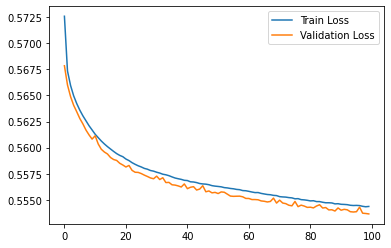

In [37]:
plt.plot(cnn_Aid_hist.history["loss"], label = "Train Loss")
plt.plot(cnn_Aid_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

In the below code, I predict x_test_noisy with the model.

In [38]:
cnnAid_decoded_img = cnn_autoencoder.predict(x_test_noisy)

In the below code, I visualize prediction results.

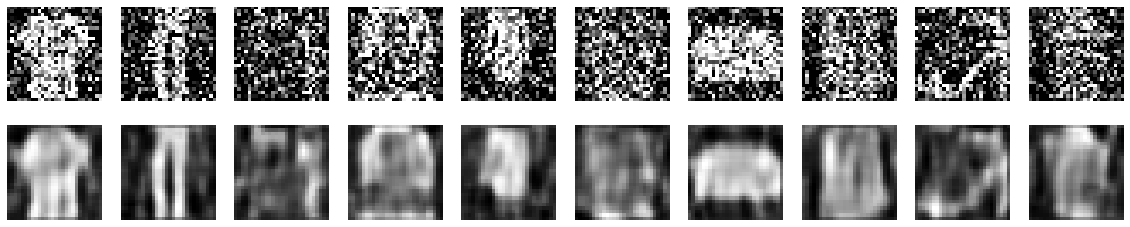

In [39]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.axis("off")
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(cnnAid_decoded_img[i].reshape(28,28))
    plt.axis("off")
plt.show()

# CONCLUSION <a id = "3"></a>
---
[Go Content](#cont)

I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.